# Dacon - 건설 기계 오일 상태 분류 AI 경진대회
sample_submission.csv
ID : 부여번호
Y_LABEL : 예측한 오일 상태 유무 (0: 정상 / 1 : 이상)

위와 같은 제출양식으로 제출
생각보다 컬럼이 많고, 어려워서,,,,,,하느님,,


In [121]:
# 데이터셋

In [122]:
#데이터 분석 모듈
import pandas as pd
import numpy as np
import random as rnd
import warnings

#시각화 모듈
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
train= pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")
train.head(5)

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [32]:
# 결측값좀 보자
train.isnull().mean()

ID                     0.000000
COMPONENT_ARBITRARY    0.000000
ANONYMOUS_1            0.000000
YEAR                   0.000000
SAMPLE_TRANSFER_DAY    0.000000
ANONYMOUS_2            0.000000
AG                     0.000000
AL                     0.000000
B                      0.000000
BA                     0.000000
BE                     0.000000
CA                     0.000000
CD                     0.098900
CO                     0.000000
CR                     0.000000
CU                     0.000000
FH2O                   0.724016
FNOX                   0.724016
FOPTIMETHGLY           0.724016
FOXID                  0.724016
FSO4                   0.724016
FTBN                   0.724016
FE                     0.000000
FUEL                   0.724016
H2O                    0.000000
K                      0.163107
LI                     0.000000
MG                     0.000000
MN                     0.000000
MO                     0.000000
NA                     0.000000
NI      

FH2O                   0.724016
FNOX                   0.724016
FOPTIMETHGLY           0.724016
FOXID                  0.724016
FSO4                   0.724016
FTBN                   0.724016
FUEL                   0.724016
SOOTPERCENTAGE         0.724016

모두 같은 값으로 결측치 발생

U100                   0.835686
U75                    0.835686
U50                    0.835686
U25                    0.835686
U20                    0.835686

U14                    0.849734
U6                     0.849734
U4                     0.849734

결측값이 에바잖아요

In [33]:
#유일한 COMPONENT_ARBITRARY 문자형 INT로 바꿔주고 시작

In [34]:
train['COMPONENT_ARBITRARY'].value_counts()

COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

In [35]:
component_mapping={"COMPONENT1":1, "COMPONENT2":2, "COMPONENT3":3, "COMPONENT4":4}

train['COMPONENT_ARBITRARY'] = train['COMPONENT_ARBITRARY'].map(component_mapping)
test['COMPONENT_ARBITRARY'] = test['COMPONENT_ARBITRARY'].map(component_mapping)

In [36]:
train['COMPONENT_ARBITRARY'].value_counts()

3    7050
1    3890
2    2316
4     839
Name: COMPONENT_ARBITRARY, dtype: int64

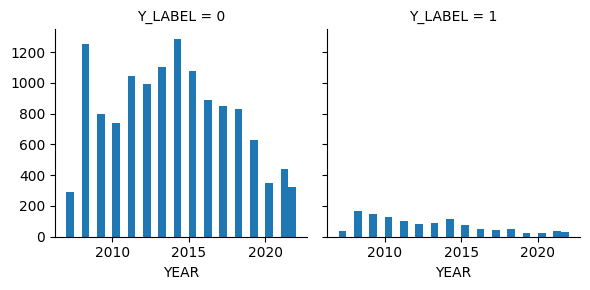

In [37]:
# 오일 샘플 진단에 따른 정상 여부
g = sns.FacetGrid(train, col='Y_LABEL')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정
g.map(plt.hist, 'YEAR', bins=30)

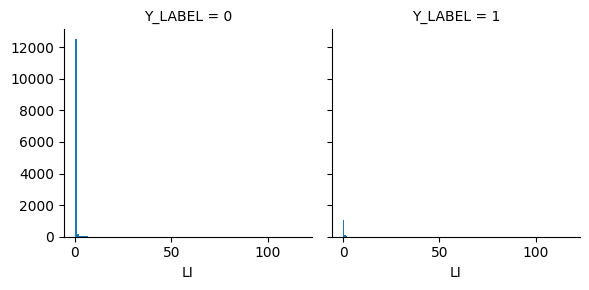

In [97]:
# 년도와는 전혀 관련 없네,,,,,,,주여,,,
# AG, AL, B, BA, BE, CA, CD, CO, CR, CU, K, LI, MG, MN, MO, NA, NI, P, PB, S, SB, SI, SN, TI, V, ZN, FUEL
# 위의 각종 원소에 따른 정상여부 하나씩 다해보기,단위 PPM

# 오일 샘플 진단에 따른 정상 여부B
g = sns.FacetGrid(train, col='Y_LABEL')
g.map(plt.hist, 'LI', bins=100)
# 원소 함유에서 유의미한 결과를 도출하진 못함

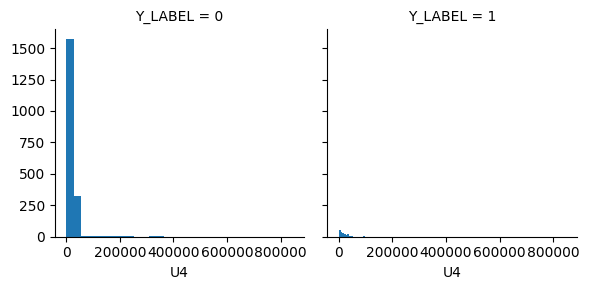

In [74]:
#Paricle count에 따른 정상여부
#U100, U75, U50, U25, U20, U14, U6, U4
#단위 particles/ml
# 오일 샘플 진단에 따른 정상 여부B
g = sns.FacetGrid(train, col='Y_LABEL')
g.map(plt.hist, 'U4', bins=30)
# 이것도 못찾음

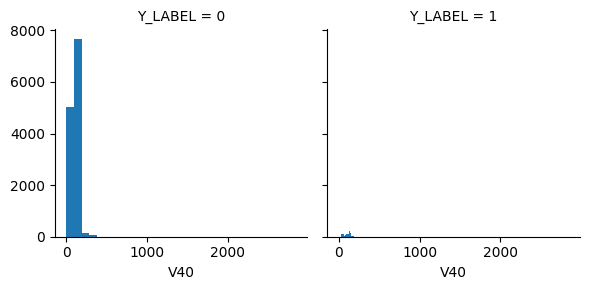

In [100]:
# Viscosity에 따른 정상여부
# V100, V40
g = sns.FacetGrid(train, col='Y_LABEL')
g.map(plt.hist, 'V40', bins=30)

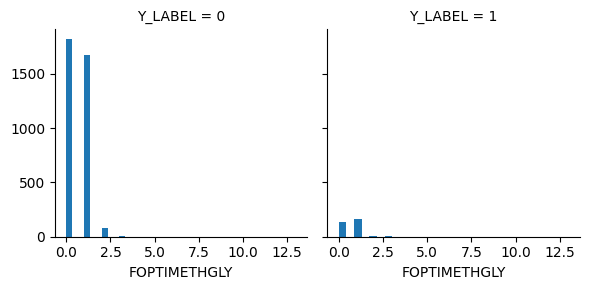

In [109]:
# 각종 수치에 따른 여부
# FH2O, FNOX, FOPTIMETHGLY, FOXID, FSO4, FTBN
g = sns.FacetGrid(train, col='Y_LABEL')
g.map(plt.hist, 'FOPTIMETHGLY', bins=30)

In [113]:
#목적 변수제거
X_train = train.drop("Y_LABEL", axis=1)
#목적 변수 역할
Y_train = train["Y_LABEL"]
#예측 대상 데이터 셋
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((14095, 53), (14095,), (6041, 19))

In [130]:
import lightgbm

ModuleNotFoundError: No module named 'lightgbm'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.4 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
